# Exploratory Data Analysis

This is a small exploratory notebook to take a first look at the data and the relations between the features

-----------


First import the needed libraries

In [43]:
import keras, ROOT, sklearn
print keras.__version__
import flat_helper
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# from keras_tqdm import TQDMNotebookCallback # uncomment this to get the progress bar
#import theano
#theano.config.gcc.cxxflags = '-march=corei7' 

## For plotting stuff
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

## Magic ipython incantation so that plots appear inline
#%matplotlib inline

sns.set() # cosmetics

2.1.1


Then load the data

In [46]:
dfQuarks = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/quarks_standard', 20000, recompute=False)
dfGluons = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/gluons_standard', 20000, recompute=False)

dfQuarksModified = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/quarks_modified', 20000, recompute=False)
dfGluonsModified = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/gluons_modified', 20000, recompute=False)

print "dfQuarks shape: ", dfQuarks.shape
print "dfGluons shape: ", dfGluons.shape
print "dfQuarksModified shape: ", dfQuarksModified.shape
print "dfGluonsModified shape: ", dfGluonsModified.shape

dfQuarks['isGluon'] = 0
dfGluons['isGluon'] = 1

dfQuarksModified['isGluon'] = 0
dfGluonsModified['isGluon'] = 1

inputData = pd.concat([dfQuarks, dfGluons])
inputDataTest = pd.concat([dfQuarksModified, dfGluonsModified])
tmpData = inputData

seed = 42
inputDataTrain, inputDataValidation = train_test_split(inputData, random_state=seed)

labels = inputData.isGluon
inputData = inputData.drop('isGluon',axis=1)

labelsTrain = inputDataTrain.isGluon
inputDataTrain = inputDataTrain.drop('isGluon',axis=1)

labelsValidation = inputDataValidation.isGluon
inputDataValidation = inputDataValidation.drop('isGluon',axis=1)

labelsTest = inputDataTest.isGluon
inputDataTest = inputDataTest.drop('isGluon',axis=1)

Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_quarks_standard_shapes.root
Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_gluons_standard_shapes.root
Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_quarks_modified_shapes.root
Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_gluons_modified_shapes.root
dfQuarks shape:  (20000, 42)
dfGluons shape:  (20000, 42)
dfQuarksModified shape:  (20000, 42)
dfGluonsModified shape:  (20000, 42)


## Exploration

Take a look at the information such as which branches, how many entries and the data type

In [3]:
print "Shape: ", dfQuarks.shape
dfQuarks.info()

#print "Shape: ", dfGluons.shape
#dfGluons.info()

Shape:  (20000, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 43 columns):
mass                 20000 non-null float32
ntowers              20000 non-null float32
radial               20000 non-null float32
dispersion           20000 non-null float32
ntracks              20000 non-null int32
trackleadDiff        20000 non-null float32
trackChargeSum       20000 non-null float32
trackAveCharge       20000 non-null float32
trackWeightCharge    20000 non-null float32
minTrackPt           20000 non-null float32
maxTrackPt           20000 non-null float32
meanTrackPt          20000 non-null float32
sumTrackPt           20000 non-null float32
weightTrackPt        20000 non-null float32
minTrackDR           20000 non-null float32
maxTrackDR           20000 non-null float32
meanTrackDR          20000 non-null float32
minTowerE            20000 non-null float32
maxTowerE            20000 non-null float32
meanTowerE           20000 non-null f

Look at the first "nevt" events for quarks and gluons, see some values of the features

In [4]:
nevt=6
dfQuarks.head(nevt)

,mass,ntowers,radial,dispersion,ntracks,trackleadDiff,trackChargeSum,trackAveCharge,trackWeightCharge,minTrackPt,...,sumTowerEhad,minTowerDR,maxTowerDR,meanTowerDR,weightTowerDR,towerTrackRatio,towerEtot,towerEemfrac,towerEhadfrac,isGluon
0,12.185929,11.0,0.045043,0.384206,10,1.298551,0.0,0.000000,-0.102923,0.658297,...,5.405257,0.016743,0.348448,0.181095,0.064661,0.669637,47.980762,0.887345,0.112655,0
1,5.329337,13.0,0.016920,0.436819,6,0.516167,0.0,0.000000,-0.129790,4.752026,...,0.000000,0.015817,0.320333,0.127750,0.083910,2.866494,184.315765,1.000000,0.000000,0
2,6.688938,3.0,0.026399,0.509502,8,20.378094,-2.0,-0.250000,0.168506,1.218615,...,117.222969,0.030171,0.315075,0.159159,0.040007,1.413262,123.225739,0.048714,0.951286,0
3,8.983985,11.0,0.027306,0.405769,9,5.734757,1.0,0.111111,0.158027,0.909293,...,77.082573,0.005041,0.331434,0.147667,0.043128,2.519197,114.692169,0.327918,0.672082,0
4,24.100706,12.0,0.111171,0.362364,11,3.184633,-1.0,-0.090909,0.038333,1.281346,...,34.700565,0.111825,0.283847,0.180765,0.090592,0.877973,53.391941,0.350079,0.649921,0
5,6.914141,11.0,0.011104,0.563266,5,1.418804,-1.0,-0.200000,-0.016988,2.957841,...,5.396185,0.006877,0.218439,0.108720,0.028538,0.951157,56.908104,0.905177,0.094823,0


In [5]:
dfGluons.head(nevt)
# As an alternative, we can look at the last "nevt" events
#dfGluons.tail(nevt)
# Or randomly sample:
#dfGluons.sample(nevt)

,mass,ntowers,radial,dispersion,ntracks,trackleadDiff,trackChargeSum,trackAveCharge,trackWeightCharge,minTrackPt,...,sumTowerEhad,minTowerDR,maxTowerDR,meanTowerDR,weightTowerDR,towerTrackRatio,towerEtot,towerEemfrac,towerEhadfrac,isGluon
0,14.367233,14.0,0.054968,0.353077,17,4.214500,1.0,0.058824,0.068357,0.629583,...,0.000000,0.014814,0.316226,0.192904,0.050253,1.113125,61.132877,1.000000,0.000000,1
1,10.668119,11.0,0.029878,0.555024,8,9.788172,0.0,0.000000,-0.520130,0.885641,...,0.000000,0.047835,0.364457,0.152005,0.102501,1.348964,125.567177,1.000000,0.000000,1
2,12.146415,13.0,0.034733,0.390114,16,8.988380,0.0,0.000000,0.188836,0.428070,...,7.648767,0.040240,0.364950,0.190241,0.044347,0.405288,43.712891,0.825023,0.174977,1
3,8.801844,8.0,0.035857,0.556150,7,21.120190,1.0,0.142857,0.364527,1.625604,...,0.000000,0.021072,0.349972,0.079114,0.022360,0.597273,47.936504,1.000000,0.000000,1
4,14.279649,9.0,0.049742,0.589295,12,31.209843,2.0,0.166667,-0.277038,0.546844,...,95.561455,0.027604,0.389931,0.175960,0.095660,1.553980,122.728569,0.221359,0.778641,1
5,17.277428,8.0,0.070760,0.371848,13,5.175539,1.0,0.076923,0.189619,0.694803,...,8.454389,0.050255,0.385021,0.164311,0.041967,0.330925,29.971394,0.717918,0.282082,1


Now we will ask for a description of the datasets, this will give us some statistical information of each feature (mean, min, max, etc)

In [6]:
dfQuarks.describe()

,mass,ntowers,radial,dispersion,ntracks,trackleadDiff,trackChargeSum,trackAveCharge,trackWeightCharge,minTrackPt,...,sumTowerEhad,minTowerDR,maxTowerDR,meanTowerDR,weightTowerDR,towerTrackRatio,towerEtot,towerEemfrac,towerEhadfrac,isGluon
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0
mean,10.143486,8.654600,0.037348,0.539091,8.042450,14.955555,-0.023450,-0.003377,0.000196,1.408093,...,41.673225,0.031849,0.284467,0.130920,0.071488,3.624436,117.187111,0.672662,0.323388,0.0
std,4.229324,4.368953,0.024821,0.140604,3.432206,16.224628,1.483782,0.228061,0.260121,2.304542,...,83.033325,0.035379,0.097632,0.054156,0.099503,14.807607,145.984619,0.313826,0.311620,0.0
min,1.163194,0.000000,0.000000,0.000000,0.000000,0.000483,-8.000000,-1.000000,-0.956445,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,7.234231,5.000000,0.020514,0.437586,6.000000,3.497933,-1.000000,-0.142857,-0.153706,0.659948,...,1.509433,0.012028,0.224975,0.093062,0.021991,0.523089,41.953974,0.432355,0.016582,0.0
50%,9.240952,8.000000,0.030497,0.517837,8.000000,9.251124,0.000000,0.000000,0.001135,0.917229,...,15.010277,0.021700,0.313759,0.128615,0.040427,1.206464,73.733616,0.754948,0.240613,0.0
75%,12.129803,11.000000,0.047002,0.618226,10.000000,20.679411,1.000000,0.142857,0.154538,1.426427,...,46.385193,0.038611,0.363847,0.165968,0.079132,2.829228,130.779575,0.979748,0.562348,0.0
max,32.184860,35.000000,0.203564,1.000000,26.000000,116.535202,7.000000,1.000000,0.996853,85.813080,...,2360.124268,0.393246,0.529587,0.393246,1.985897,906.648499,2658.427734,1.000000,1.000000,0.0


In [7]:
dfGluons.describe()

,mass,ntowers,radial,dispersion,ntracks,trackleadDiff,trackChargeSum,trackAveCharge,trackWeightCharge,minTrackPt,...,sumTowerEhad,minTowerDR,maxTowerDR,meanTowerDR,weightTowerDR,towerTrackRatio,towerEtot,towerEemfrac,towerEhadfrac,isGluon
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0
mean,13.587820,12.49070,0.054437,0.435623,11.454600,9.036100,0.008300,0.002438,0.005914,1.009905,...,52.523655,0.034133,0.325218,0.151159,0.120150,3.305717,144.833221,0.657860,0.341340,1.0
std,4.567275,5.19121,0.028272,0.114319,4.019881,10.818460,1.779435,0.177677,0.194962,1.394539,...,95.593033,0.028455,0.071974,0.045544,0.155326,15.335282,184.578918,0.266845,0.266371,0.0
min,2.256459,0.00000,0.000000,0.000000,0.000000,0.000986,-9.000000,-1.000000,-0.927575,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,10.332701,9.00000,0.034168,0.356576,9.000000,2.095933,-1.000000,-0.111111,-0.112556,0.608582,...,7.289479,0.015535,0.295064,0.120321,0.040174,0.715435,52.385676,0.459673,0.104476,1.0
50%,12.955534,12.00000,0.049180,0.411027,11.000000,5.448665,0.000000,0.000000,0.003513,0.773870,...,24.218706,0.026635,0.347335,0.150369,0.069910,1.387952,83.995689,0.690568,0.308705,1.0
75%,16.264200,16.00000,0.069413,0.486932,14.000000,11.843875,1.000000,0.111111,0.122417,1.073161,...,56.467326,0.044332,0.377050,0.181512,0.134940,2.936328,158.799545,0.895057,0.539436,1.0
max,32.493828,41.00000,0.225824,1.000000,32.000000,115.162285,8.000000,1.000000,0.941223,67.356003,...,1927.546509,0.391917,0.570072,0.391917,3.469423,1301.483398,3376.106201,1.000000,1.000000,1.0


Test some assumptions on the data

In [8]:
dfQuarks.query('mass < 2.5')

,mass,ntowers,radial,dispersion,ntracks,trackleadDiff,trackChargeSum,trackAveCharge,trackWeightCharge,minTrackPt,...,sumTowerEhad,minTowerDR,maxTowerDR,meanTowerDR,weightTowerDR,towerTrackRatio,towerEtot,towerEemfrac,towerEhadfrac,isGluon
1268,2.064764,0.0,0.013451,0.672909,4,23.462528,0.0,0.000000,-0.844948,2.188379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1813,2.402731,1.0,0.010976,0.599734,3,15.066229,-1.0,-0.333333,-0.057066,21.732222,...,29.181402,0.029310,0.029310,0.029310,0.007322,0.327023,29.181402,0.000000,1.000000,0
3035,1.171822,3.0,0.005085,0.710806,2,5.236469,0.0,0.000000,0.047721,22.943089,...,0.000000,0.008031,0.016154,0.012316,0.006841,1.627435,83.198784,1.000000,0.000000,0
3153,1.948636,4.0,0.001758,1.000000,1,1.000000,1.0,1.000000,0.016682,1.823426,...,51.683765,0.002700,0.061871,0.021873,0.007720,66.793427,121.792892,0.575642,0.424358,0
3535,2.411657,1.0,0.009278,1.000000,1,1.000000,-1.0,-1.000000,-0.208420,21.907393,...,258.050507,0.011967,0.011967,0.011967,0.029379,11.779152,258.050507,0.000000,1.000000,0
3976,2.497957,2.0,0.013278,0.543195,7,36.751949,-1.0,-0.142857,0.267236,0.496240,...,0.000000,0.021984,0.036746,0.029365,0.001373,0.050172,5.359903,1.000000,0.000000,0
4316,2.408123,3.0,0.007058,1.000000,1,1.000000,1.0,1.000000,0.237748,28.571125,...,74.533127,0.002497,0.019101,0.010435,0.014609,4.206124,120.173698,0.379788,0.620212,0
4851,2.034097,2.0,0.007983,0.707544,2,2.871540,0.0,0.000000,-0.026139,39.377323,...,84.220222,0.028320,0.078896,0.053608,0.023971,1.070326,87.366653,0.036014,0.963986,0
6276,2.267599,3.0,0.006351,0.837729,2,16.976456,0.0,0.000000,0.137536,4.873194,...,78.676659,0.011175,0.033090,0.019098,0.010248,3.708041,99.089409,0.206003,0.793997,0
6717,2.480016,2.0,0.010717,0.624702,4,27.113461,0.0,0.000000,-0.349760,4.673119,...,0.000000,0.010272,0.019176,0.014724,0.004921,0.614456,45.156445,1.000000,0.000000,0


In [9]:
dfQuarks.query('radial == dispersion')


,mass,ntowers,radial,dispersion,ntracks,trackleadDiff,trackChargeSum,trackAveCharge,trackWeightCharge,minTrackPt,...,sumTowerEhad,minTowerDR,maxTowerDR,meanTowerDR,weightTowerDR,towerTrackRatio,towerEtot,towerEemfrac,towerEhadfrac,isGluon
2676,3.266142,7.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,199.603806,0.005753,0.202912,0.075689,0.039181,0.0,265.930176,0.249413,0.750587,0
5811,4.718185,8.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,110.900642,0.007274,0.344385,0.155055,0.041724,0.0,369.734253,0.700053,0.299947,0
7492,3.767240,6.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,3.489137,0.008912,0.127717,0.053590,0.123813,0.0,707.078735,0.995065,0.004935,0
10164,4.299165,10.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,710.169128,0.010126,0.282869,0.103266,0.336093,0.0,1879.551270,0.622160,0.377840,0
11216,7.178011,5.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,333.427612,0.008150,0.390556,0.235734,0.057469,0.0,341.210144,0.022809,0.977191,0
13845,5.641160,12.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,52.835903,0.002402,0.380079,0.069484,0.049797,0.0,230.936340,0.771210,0.228790,0
13941,8.226786,9.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,703.635681,0.031976,0.374051,0.176774,0.496397,0.0,925.153442,0.239439,0.760561,0
15480,4.030625,9.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,28.097120,0.005330,0.245463,0.055184,0.029439,0.0,138.531693,0.797179,0.202821,0
15782,4.461095,6.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,23.540478,0.011446,0.336123,0.109097,0.073985,0.0,340.648499,0.930895,0.069105,0
17902,7.173931,7.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,60.368492,0.014861,0.283590,0.124942,0.042283,0.0,111.094131,0.456601,0.543399,0


### Visualization

Box plot of the stat information

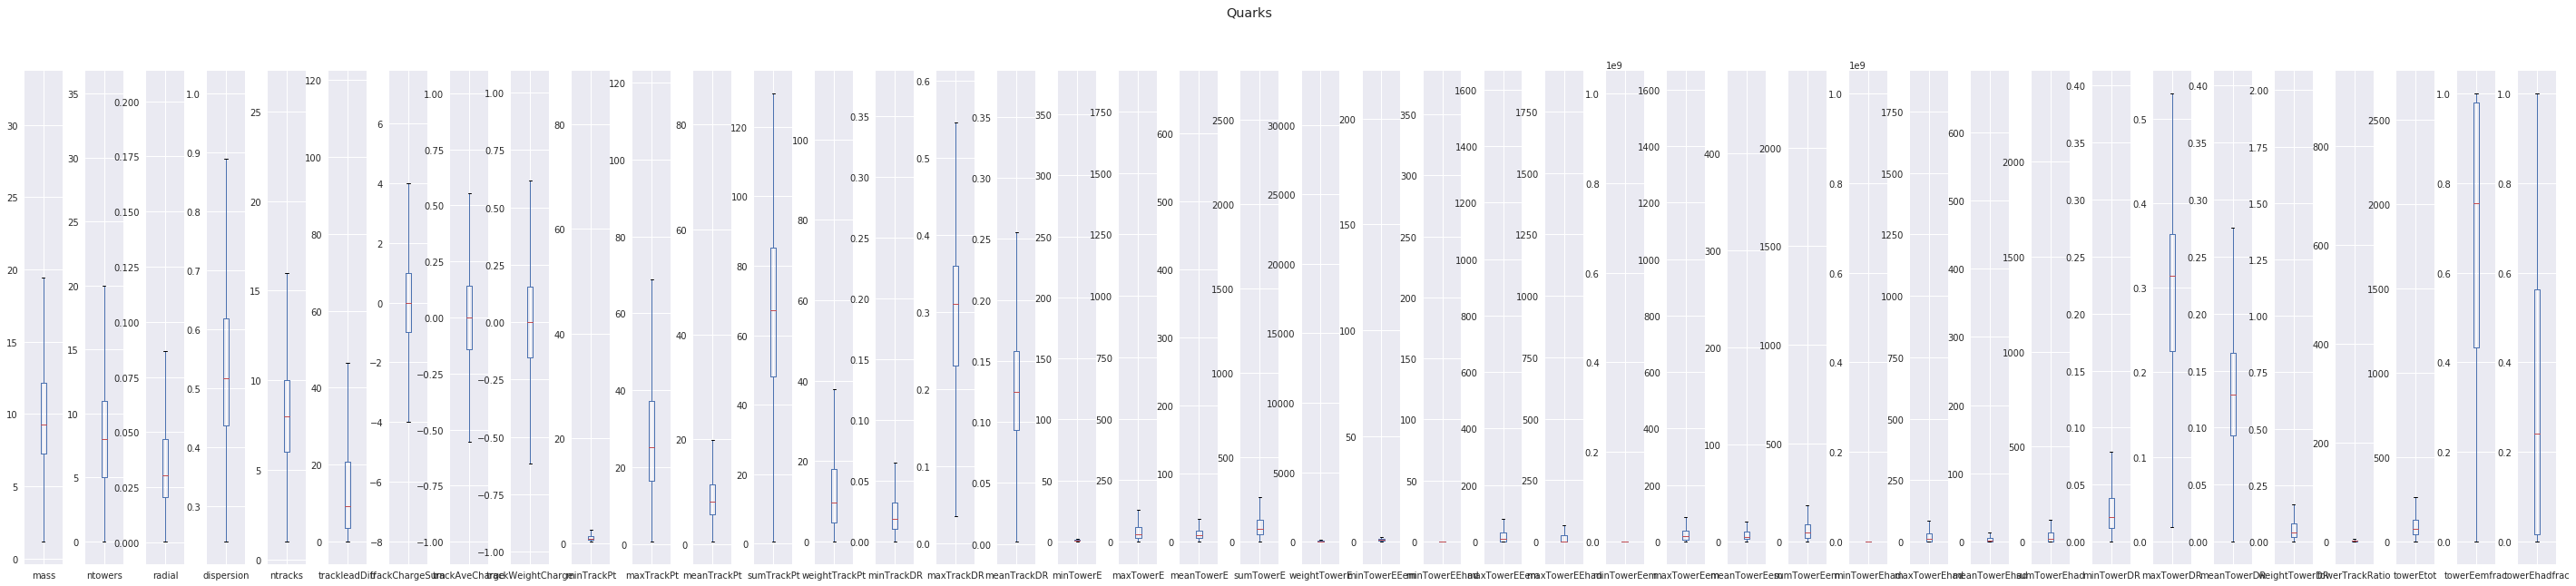

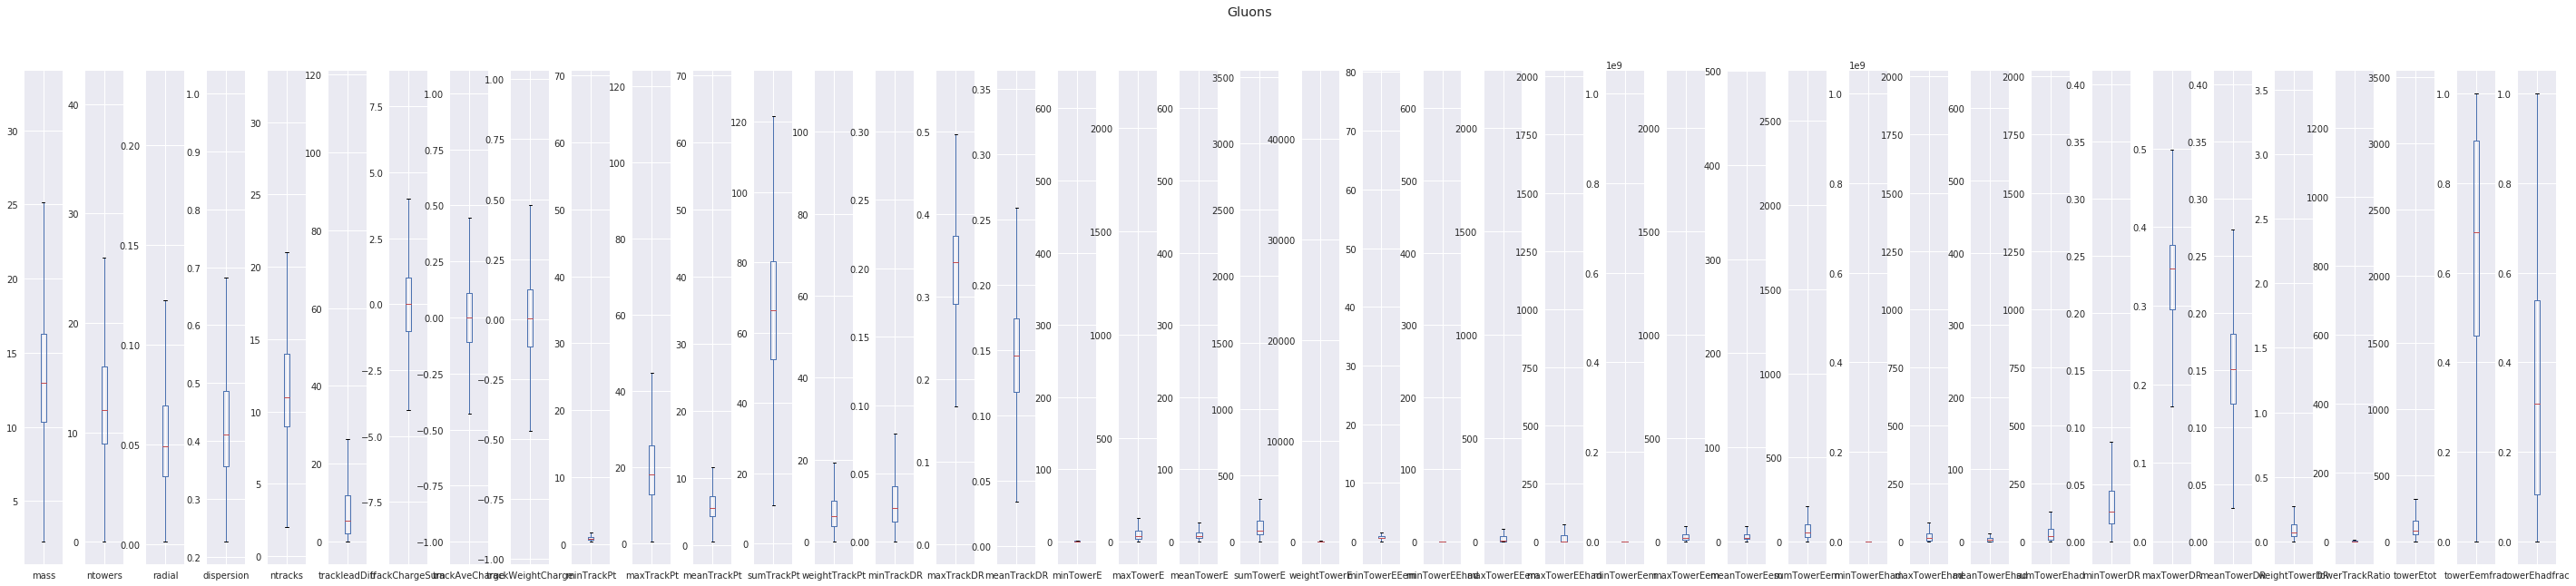

In [41]:
dfQuarks.drop('isGluon',axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(50,10))
plt.subplots_adjust(wspace=0.6)
plt.suptitle("Quarks")
plt.show()
dfGluons.drop('isGluon',axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(50,10))
plt.subplots_adjust(wspace=0.6)
plt.suptitle("Gluons")
plt.show()

Alternative statistical plots

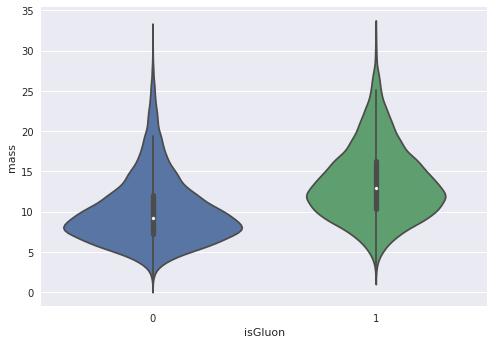

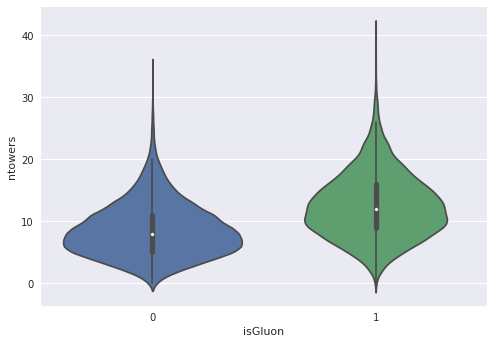

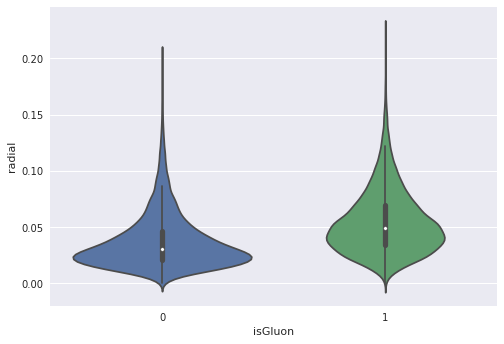

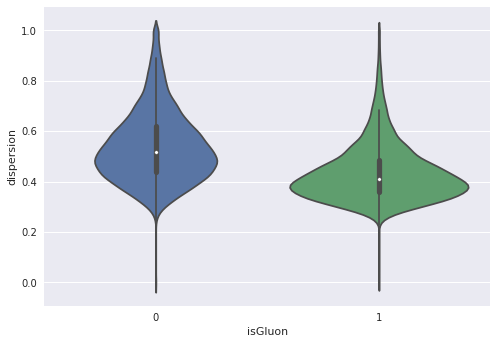

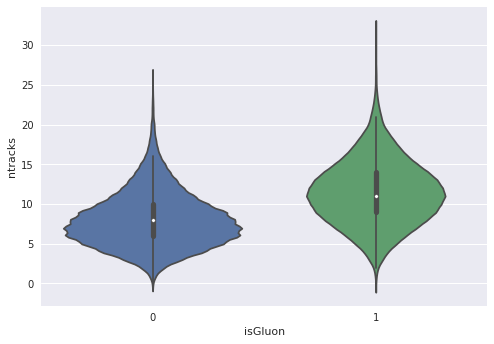

In [48]:
sns.violinplot(x='isGluon',y='mass',data=tmpData)
plt.show()

sns.violinplot(x='isGluon',y='ntowers',data=tmpData)
plt.show()

sns.violinplot(x='isGluon',y='radial',data=tmpData)
plt.show()

sns.violinplot(x='isGluon',y='dispersion',data=tmpData)
plt.show()

sns.violinplot(x='isGluon',y='ntracks',data=tmpData)
plt.show()

Plot some 1D histograms

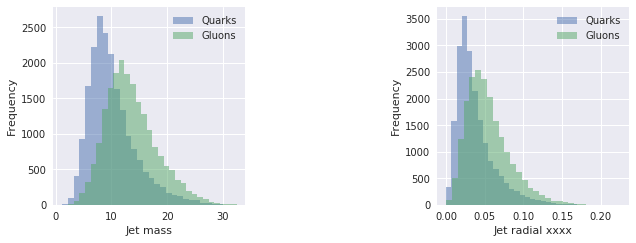

In [11]:
fig, ax = plt.subplots(1,2)

ax[0].hist(dfQuarks.mass, 30, alpha=0.5, label="Quarks")
ax[0].hist(dfGluons.mass, 30, alpha=0.5, label="Gluons")
ax[1].hist(dfQuarks.radial, 30, alpha=0.5, label="Quarks")
ax[1].hist(dfGluons.radial, 30, alpha=0.5, label="Gluons")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_xlabel("Jet mass")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Jet radial xxxx")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

plt.show()

Or plot all at the same time

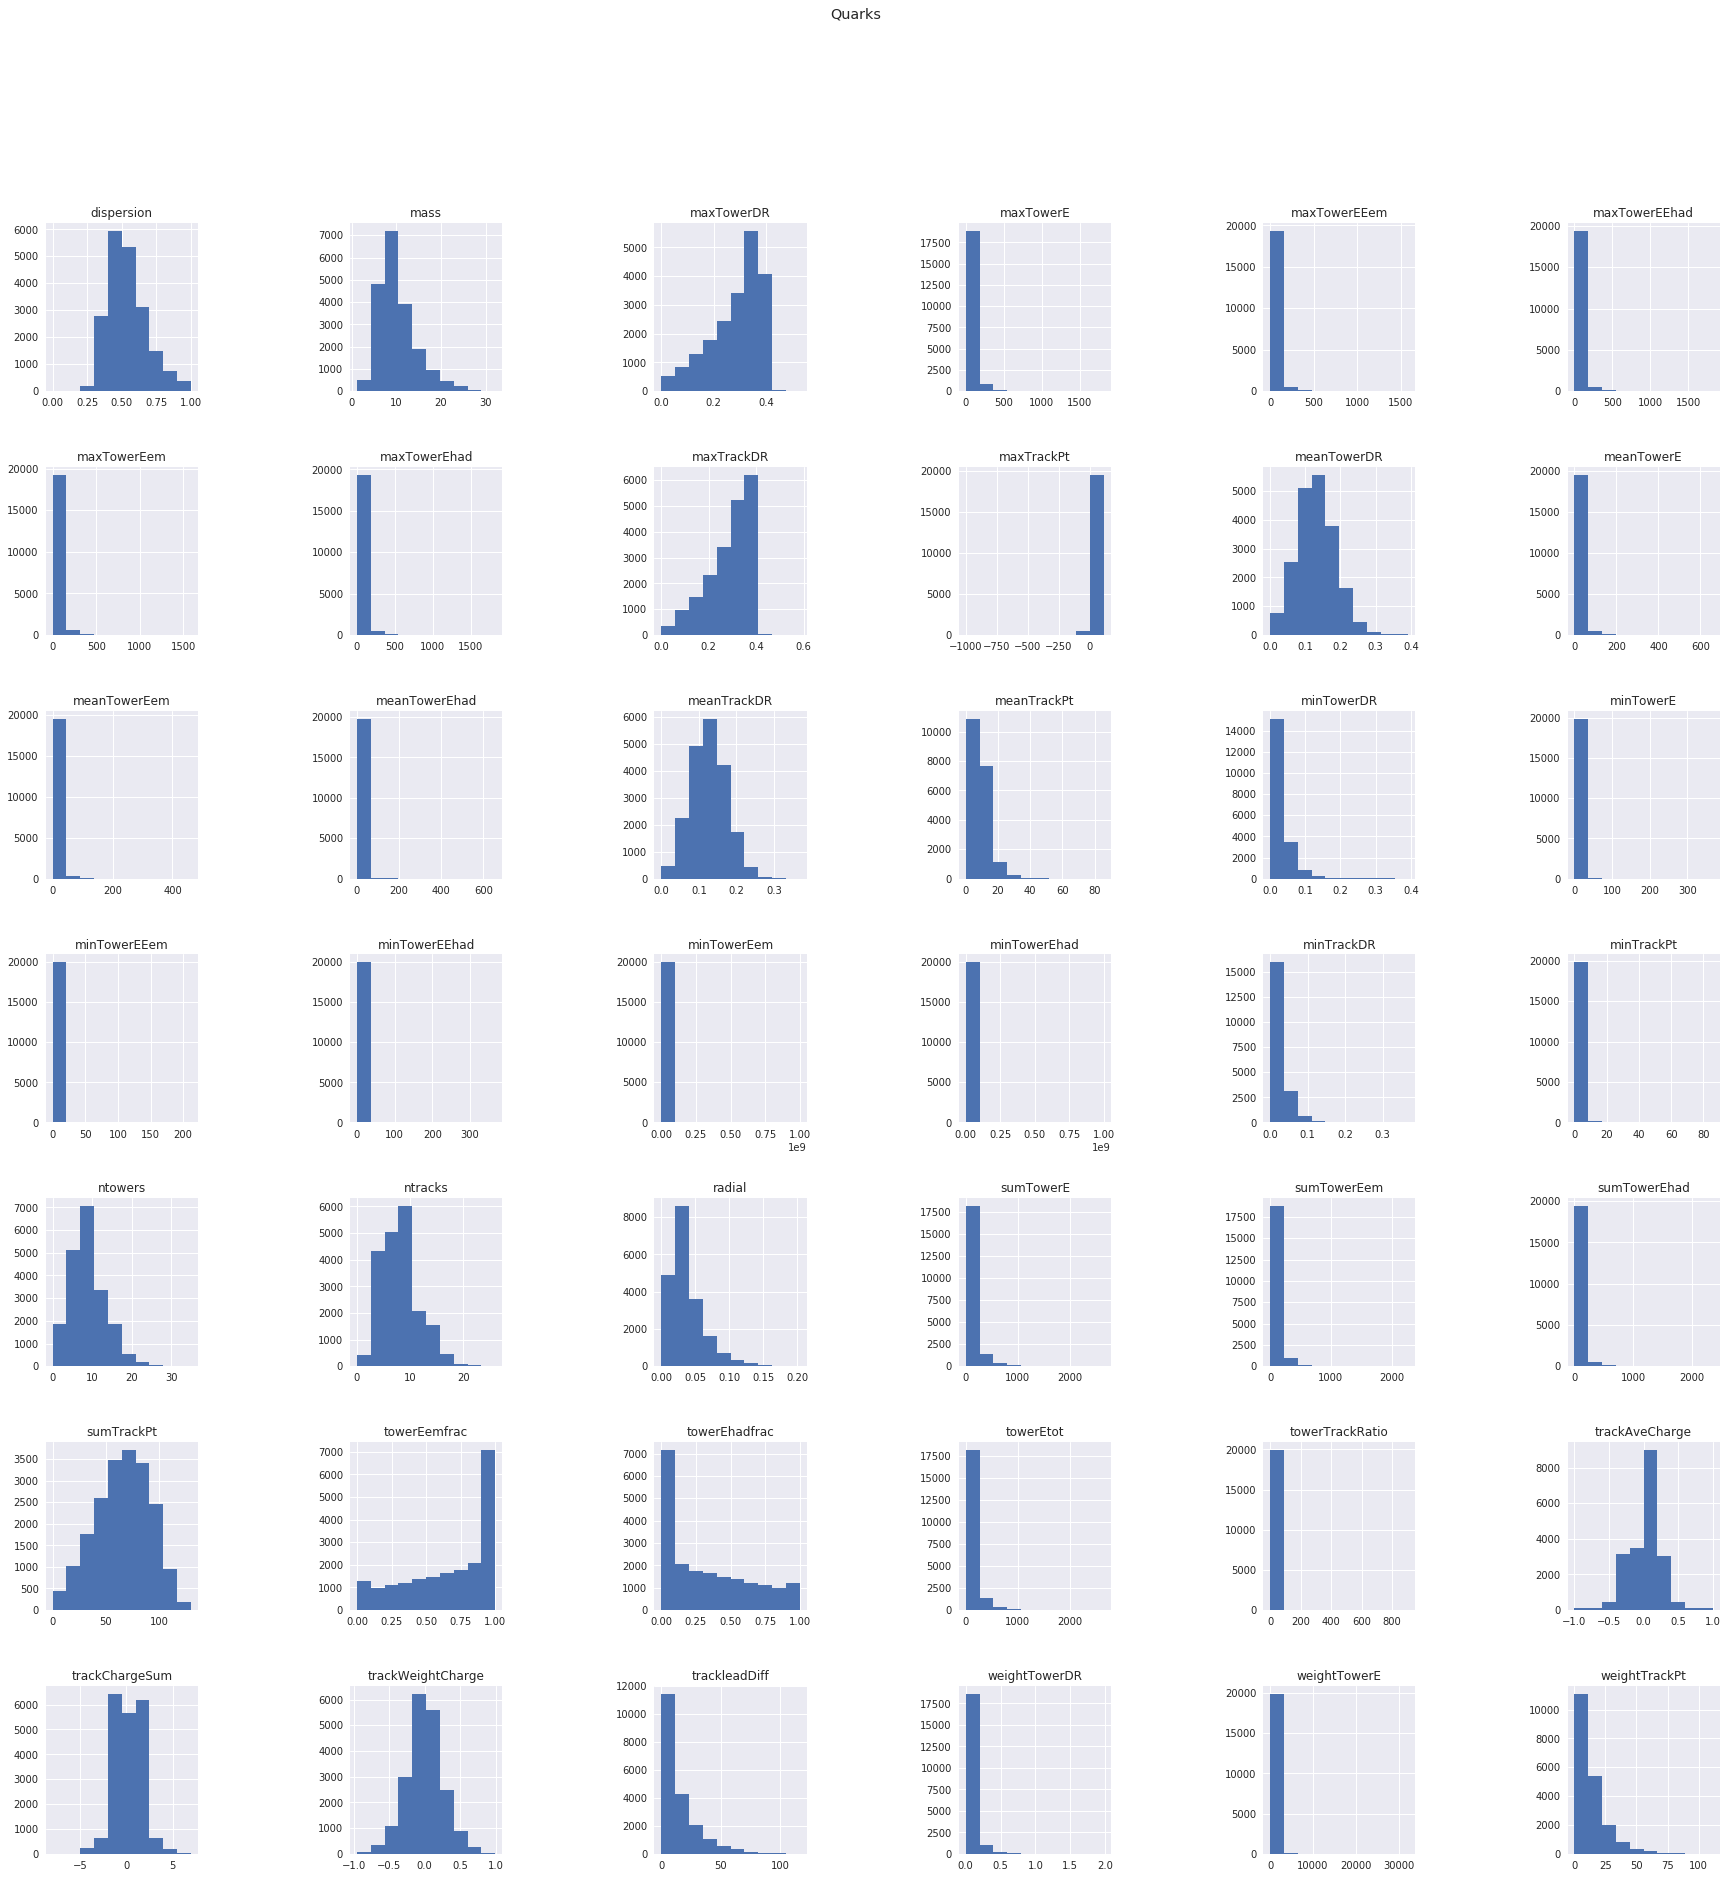

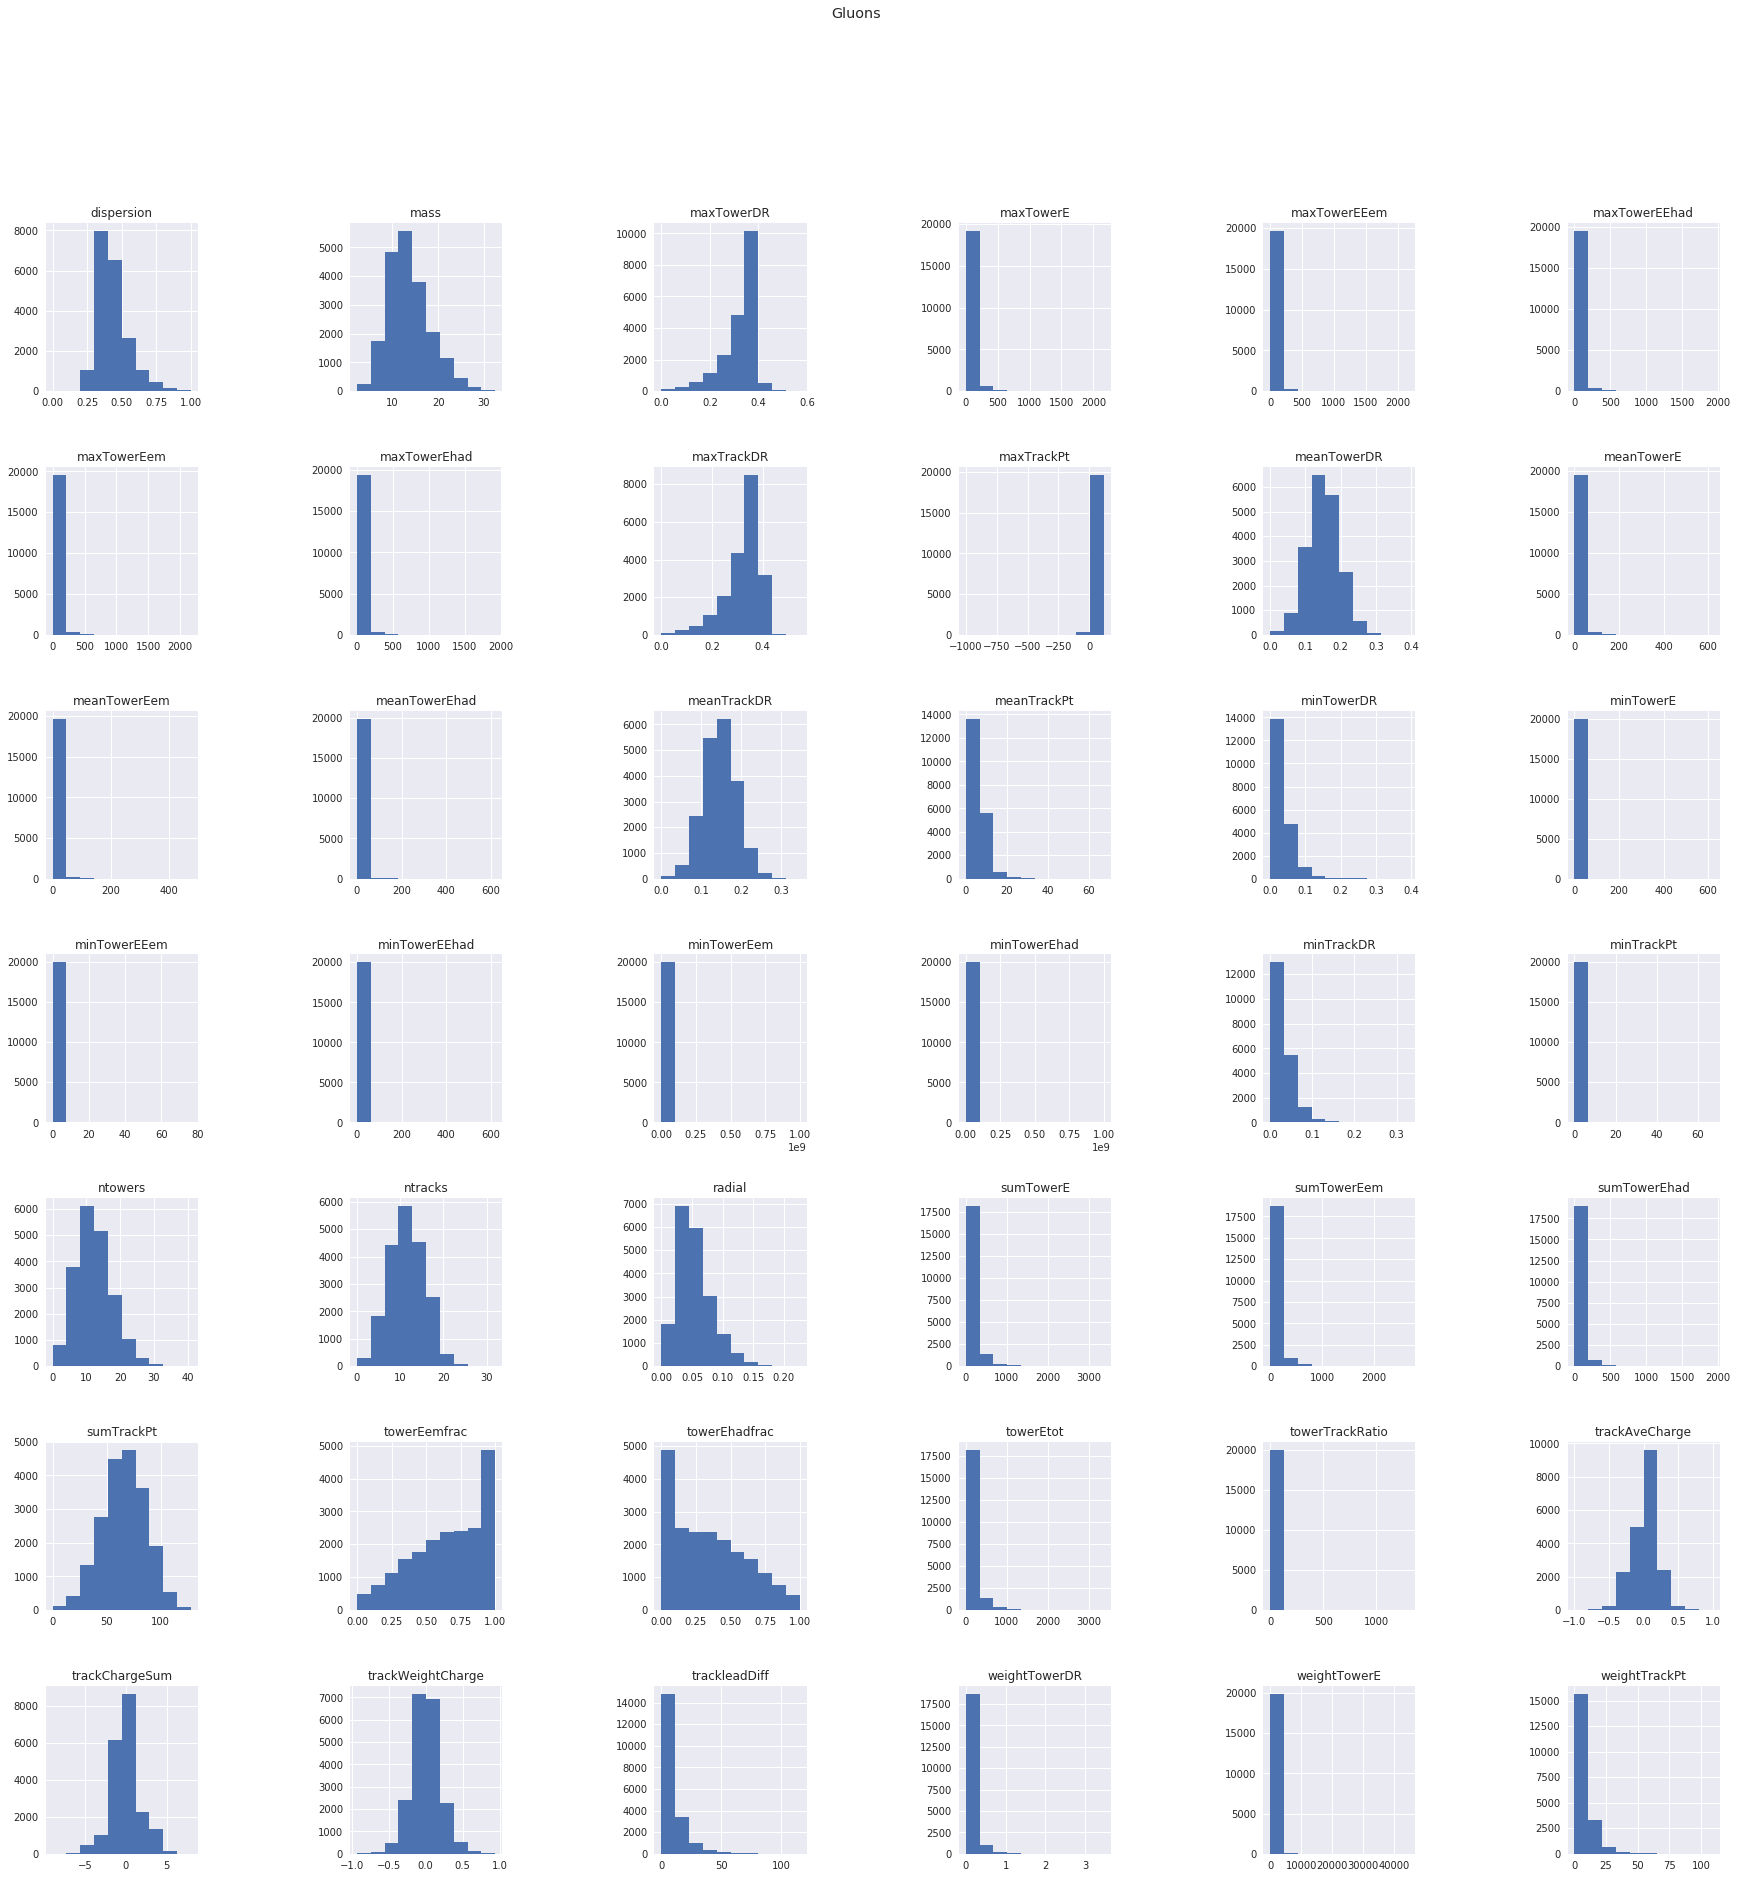

In [50]:
dfQuarks.drop('isGluon',axis=1).hist(figsize=(30,30))
plt.subplots_adjust(hspace=0.45, wspace=1)
plt.suptitle("Quarks")
plt.show()
dfGluons.drop('isGluon',axis=1).hist(figsize=(30,30))
plt.subplots_adjust(hspace=0.45, wspace=1)
plt.suptitle("Gluons")
plt.show()

Different 1D plots

In [ ]:
sns.countplot(x='ntowers', data=dfQuarks)
plt.suptitle("Quarks")
plt.show()
sns.countplot(x='ntowers', data=dfGluons)
plt.suptitle("Gluons")
plt.show()

Another way to plot

In [ ]:
sns.distplot(dfQuarks.ntracks, kde=False)
plt.suptitle("Quarks")
plt.show()

sns.distplot(dfGluons.ntracks, kde=False)
plt.suptitle("Gluons")
plt.show()

tmpData = inputData
tmpData["isGluon"] = labels

tmpData.groupby('isGluon').mass.hist(alpha=0.6)
plt.legend()
plt.show()

# This next one is slow
#sns.stripplot(x='mass', y='dispersion', data=inputData, alpha=0.3, jitter=True) # Maybe jitter should be False
#plt.show()

# This one is slow too
#sns.swarmplot(x='mass', y='dispersion', data=inputData)
#plt.show()

Plot some 2D scatter plots

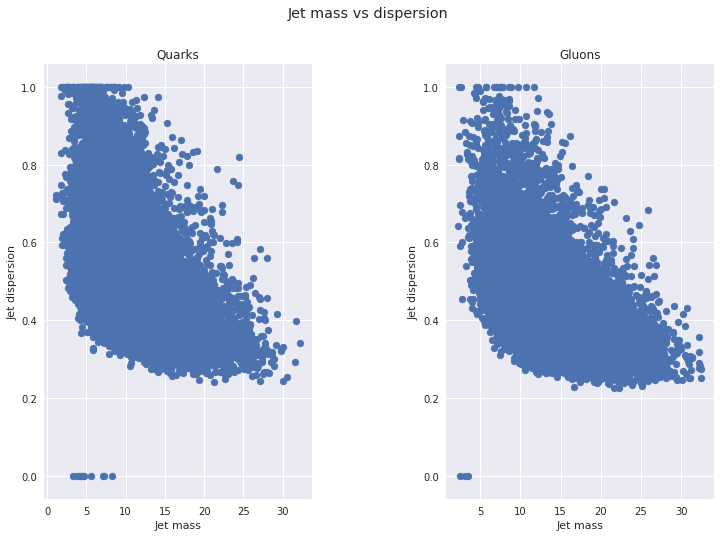

In [53]:
fig, ax = plt.subplots(1,2, figsize=(12,8))

ax[0].scatter(dfQuarks.mass, dfQuarks.dispersion)
ax[1].scatter(dfGluons.mass, dfGluons.dispersion)

ax[0].set_title("Quarks")
ax[1].set_title("Gluons")
ax[0].set_xlabel("Jet mass")
ax[1].set_xlabel("Jet mass")
ax[0].set_ylabel("Jet dispersion")
ax[1].set_ylabel("Jet dispersion")
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Jet mass vs dispersion")

plt.show()

Or plot all combinations simultaneously

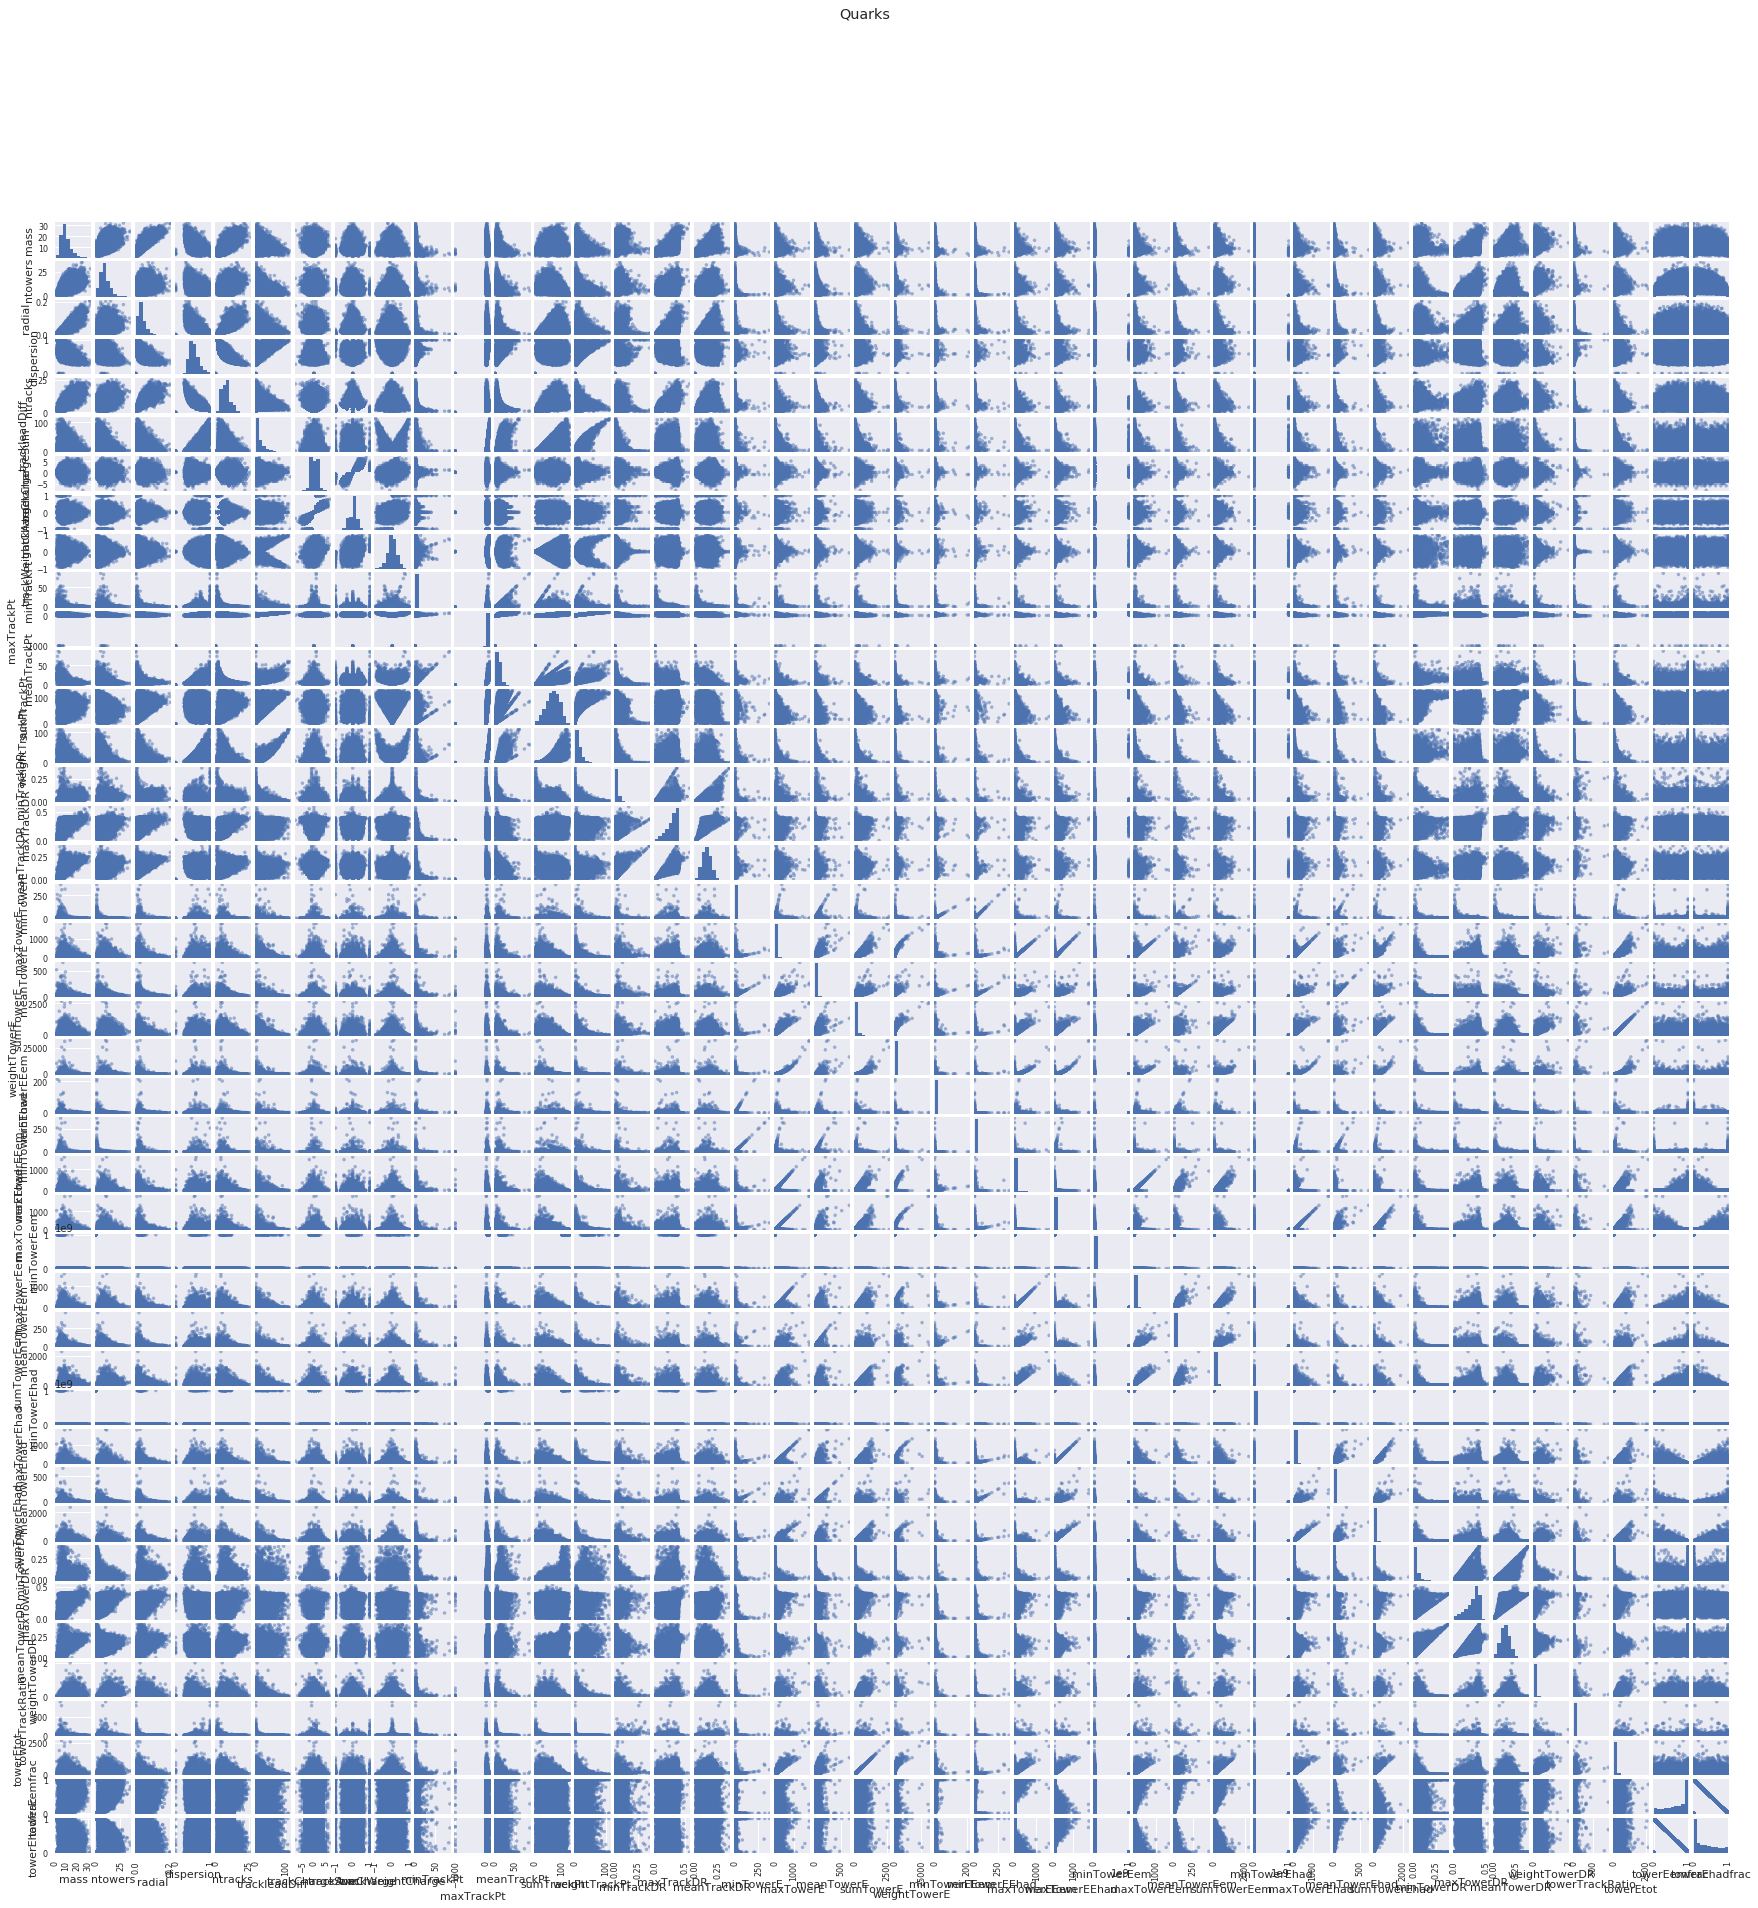

In [ ]:
scatter_matrix(dfQuarks.drop('isGluon',axis=1), figsize=(30,30))
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.suptitle("Quarks")
plt.show()
scatter_matrix(dfGluons.drop('isGluon',axis=1), figsize=(30,30))
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.suptitle("Gluons")
plt.show()

Remove outliers

In [26]:
dfQuarks = dfQuarks.drop(dfQuarks.query('dispersion == 0').index.get_values())
dfGluons = dfGluons.drop(dfGluons.query('dispersion == 0').index.get_values())

inputData = pd.concat([dfQuarks, dfGluons])

inputDataTrain, inputDataValidation = train_test_split(inputData, random_state=42)

labels = inputData.isGluon
inputData = inputData.drop('isGluon',axis=1)

labelsTrain = inputDataTrain.isGluon
inputDataTrain = inputDataTrain.drop('isGluon',axis=1)

labelsValidation = inputDataValidation.isGluon
inputDataValidation = inputDataValidation.drop('isGluon',axis=1)

A better 2D plot

In [ ]:
sns.jointplot(x="mass", y="dispersion", data=dfQuarks, kind = 'reg',fit_reg= True, size = 7)
plt.show()

Other 2D plots

In [ ]:
sns.lmplot(x='mass', y='dispersion', hue='isGluon', data=tmpData, fit_reg=False, scatter_kws={'alpha':0.5})
plt.show()

sns.pairplot(tmpData, hue='isGluon');
plt.show()

Get the correlation matrix

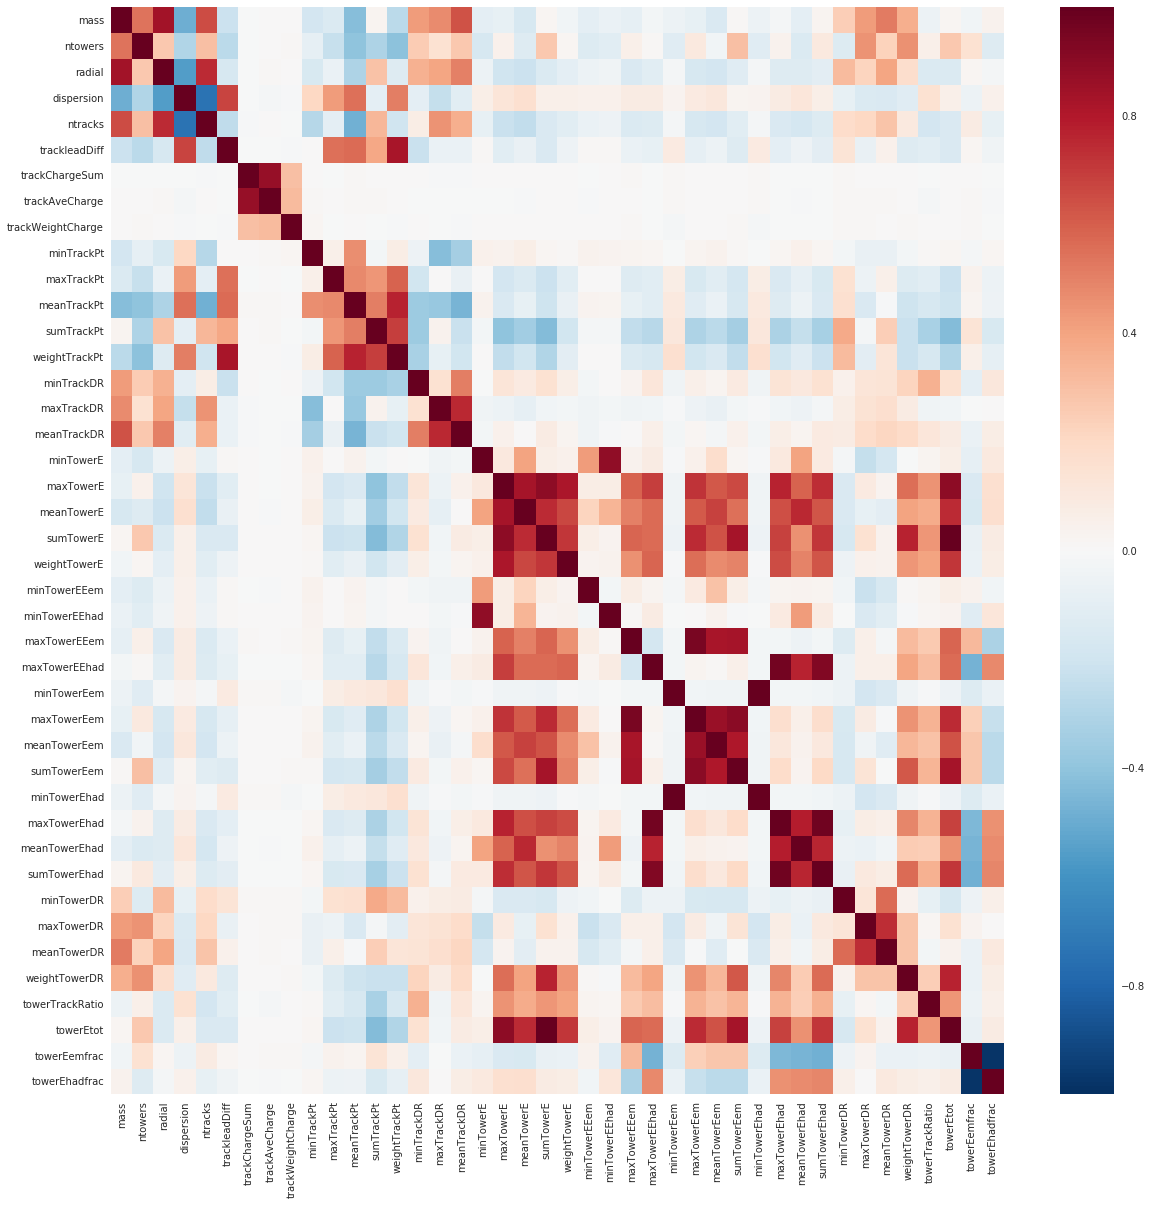

In [60]:
corrQuarks = dfQuarks.drop('isGluon',axis=1).corr()
sns.plt.figure(figsize=(20,20))
sns.heatmap(corrQuarks,
            xticklabels=corrQuarks.columns.values,
            yticklabels=corrQuarks.columns.values)
sns.plt.show()

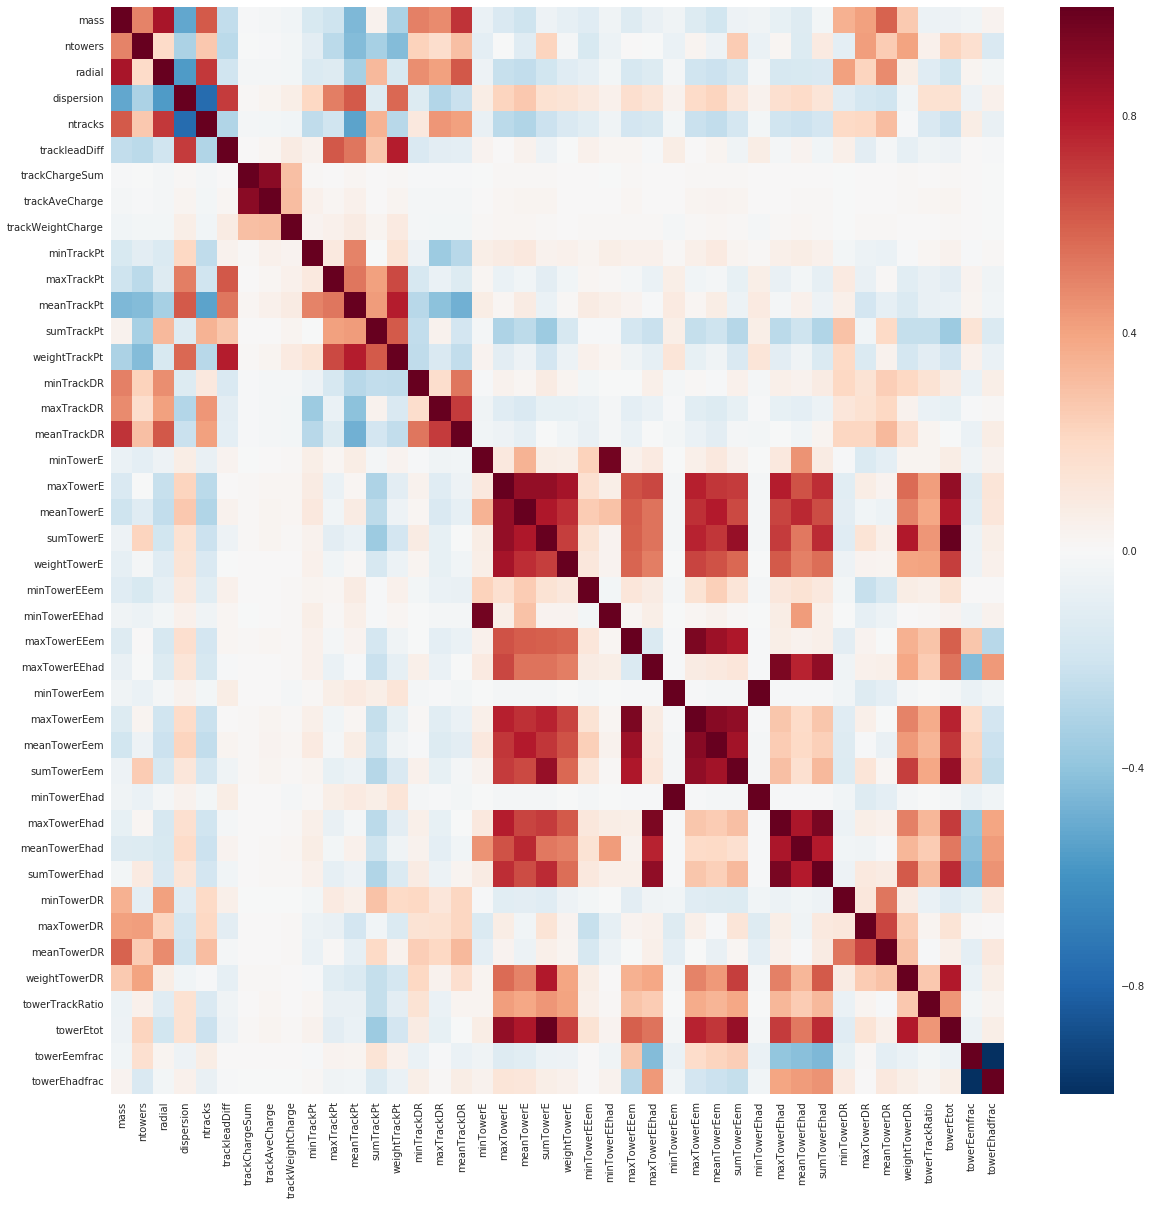

In [61]:
corrGluons = dfGluons.drop('isGluon',axis=1).corr()
sns.plt.figure(figsize=(20,20))
sns.heatmap(corrGluons,
            xticklabels=corrGluons.columns.values,
            yticklabels=corrGluons.columns.values)
sns.plt.show()

Other options

In [ ]:
sns.plt.figure(figsize=(20,20))
sns.heatmap(corrGluons[(corrGluons >= 0.5) | (corrGluons <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
sns.plt.show()

In [ ]:
sns.regplot(x="mass",y='radial', data=dfQuarks)
plt.show()

### Dimensionality Reduction

#### Principal Component Analysis

PCA to only two dimensions

In [29]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(inputData)
print "Shape: ", reduced_data.shape

Shape:  (39987, 2)


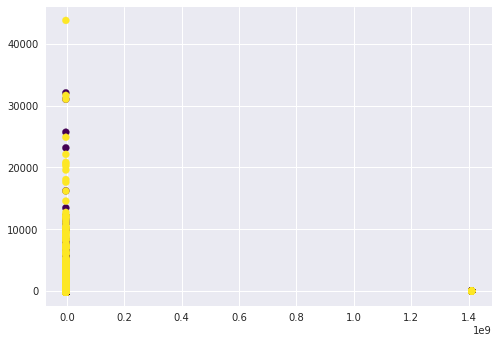

In [30]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='viridis')

plt.show()

#### Multidimensional Scaling

In [ ]:
recompute = False

mds=None
mds_reduced_data=None

# This algorithm is really slow, use the cache if available (I still have not been able to run it)
if recompute:
    mds = MDS(n_components=2, n_init=2, max_iter=1, random_state=42)
    mds_reduced_data = mds.fit_transform(inputData)
    
    with open("MDS_reducedData.pkl", "w") as file:
        import pickle
        pickle.dump(mds_reduced_data, file)
    with open("MDS_trans.pkl", "w") as file:
        import pickle
        pickle.dump(mds, file)
else:
    with open("MDS_reducedData.pkl", "r") as file:
        import pickle
        mds_reduced_data = pickle.load(file)
    with open("MDS_trans.pkl", "r") as file:
        import pickle
        mds = pickle.load(file)

if mds_reduced_data is not None:
    plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='viridis')
    plt.show()

#### t-SNE

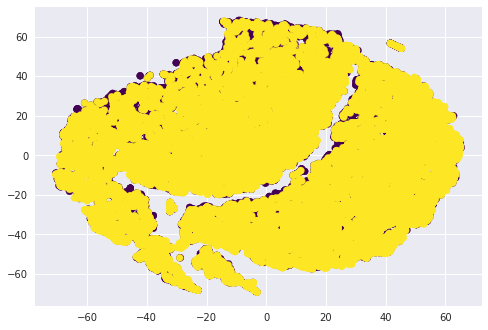

In [31]:
recompute = False

tsne=None
tsne_reduced_data=None

# This algorithm is slow, so use the cache first
if recompute:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_reduced_data = tsne.fit_transform(inputData)

    with open("TSNE_reducedData.pkl", "w") as file:
        import pickle
        pickle.dump(tsne_reduced_data, file)
    with open("TSNE_trans.pkl", "w") as file:
        import pickle
        pickle.dump(tsne, file)
else:
    with open("TSNE_reducedData.pkl", "r") as file:
        import pickle
        tsne_reduced_data = pickle.load(file)
    with open("TSNE_trans.pkl", "r") as file:
        import pickle
        tsne = pickle.load(file)

if tsne_reduced_data is not None:
    plt.scatter(tsne_reduced_data[:,0], tsne_reduced_data[:,1], c=labels, cmap='viridis')
    plt.show()

## Support Vector Machine

In [32]:
recompute=True

XTrain = inputDataTrain.loc[:,:]
YTrain = np.ravel(labelsTrain)
XVal = inputDataValidation.loc[:,:]
YVal = np.ravel(labelsTest)
XTest= inputDataTest.loc[:,:]
YTest= np.ravel(labelsTest)

SVM_YPred=None
clf=None

if recompute:
    from sklearn import svm
    from sklearn.metrics import classification_report

    nIn = len(inputDataTrain.columns)

    clf = svm.SVC()

    clf.fit(XTrain, YTrain)

    SVM_YPred = clf.predict(XTest)
    
    with open("SVM_YPred.pkl", "w") as file:
        import pickle
        pickle.dump(SVM_YPred, file)
    with open("SVM_Classifier.pkl", "w") as file:
        import pickle
        pickle.dump(clf, file)

    #print(classification_report(YTest, YPred, target_names=target_names))
else:
    with open("SVM_YPred.pkl", "r") as file:
        import pickle
        SVM_YPred = pickle.load(file)
    with open("SVM_Classifier.pkl", "r") as file:
        import pickle
        clf = pickle.load(file)

0.618060135931


## Basic Neural Network

In [6]:
from keras.models import Sequential
from keras.layers import Dense

nIn = len(inputDataTrain.columns)

XTrain = inputDataTrain.loc[:,:]
YTrain = np.ravel(labelsTrain)
XVal = inputDataValidation.loc[:,:]
YVal = np.ravel(labelsTest)
XTest= inputDataTest.loc[:,:]
YTest= np.ravel(labelsTest)


neurons = nIn + 3 
# create model
model = Sequential()
model.add(Dense(neurons,input_dim=nIn, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(neurons, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_normal'))
# Compile model          
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(XTrain, YTrain, validation_data=(XVal, YVal), epochs=10, batch_size=50, verbose=2)
# calculate predictions
#predictions = model.predict(XTrain)
# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)

ValueError: could not broadcast input array from shape (9,1) into shape (9)

## Deep Belief Neural Network

## Ideas on decorrelating the input variables

In [ ]:
import scipy.linalg as la

print corrGluons
#print numpy.sqrt(corrGluons,dtype='complex128') # This is doing the square root of individual matrix elements
print la.cholesky(corrGluons)
print la.inv(la.cholesky(corrGluons))

dfGluonsDecorr = dfGluons.drop('isGluon',axis=1).dot(la.inv(la.cholesky(corrGluons).T))

dfGluonsDecorr.corr()


## Compare all ML Methods using ROC curves

SVM AUC:  0.618060135931


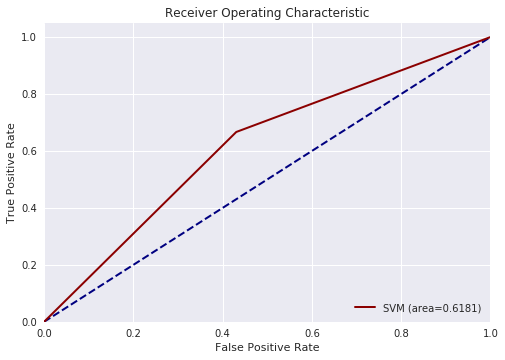

In [37]:
from sklearn.metrics import roc_curve, auc

plt.figure()
lw=2

plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')

if SVM_YPred is not None:
    #print roc_auc_score(SVM_YPred, YTest)
    
    SVM_fpr, SVM_tpr, SVM_thresh = roc_curve(SVM_YPred, YTest)
    SVM_auc = auc(SVM_fpr,SVM_tpr)
    
    print "SVM AUC: ", SVM_auc
    
    plt.plot(SVM_fpr, SVM_tpr, color='darkred', lw=lw, label="SVM (area=%0.4f)" % SVM_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()